In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(tf.__version__)

1.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

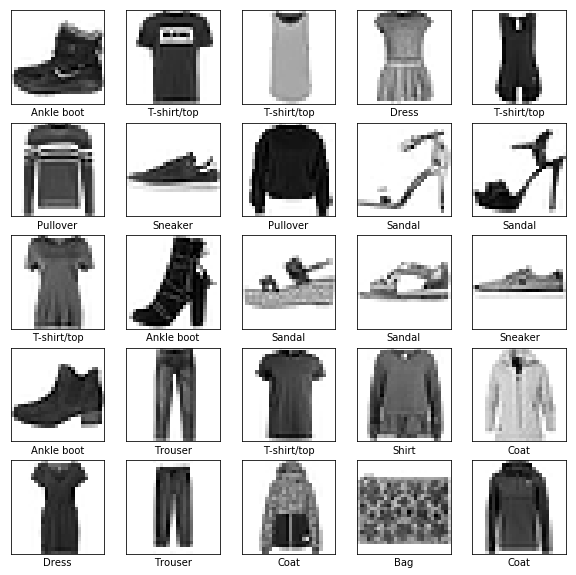

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5001 - acc: 0.8265
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3751 - acc: 0.8646: 
Epoch 3/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.3356 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3108 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2934 - acc: 0.8918


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 21us/step
Test accuracy: 0.8755


In [12]:
predictions = model.predict(test_images)

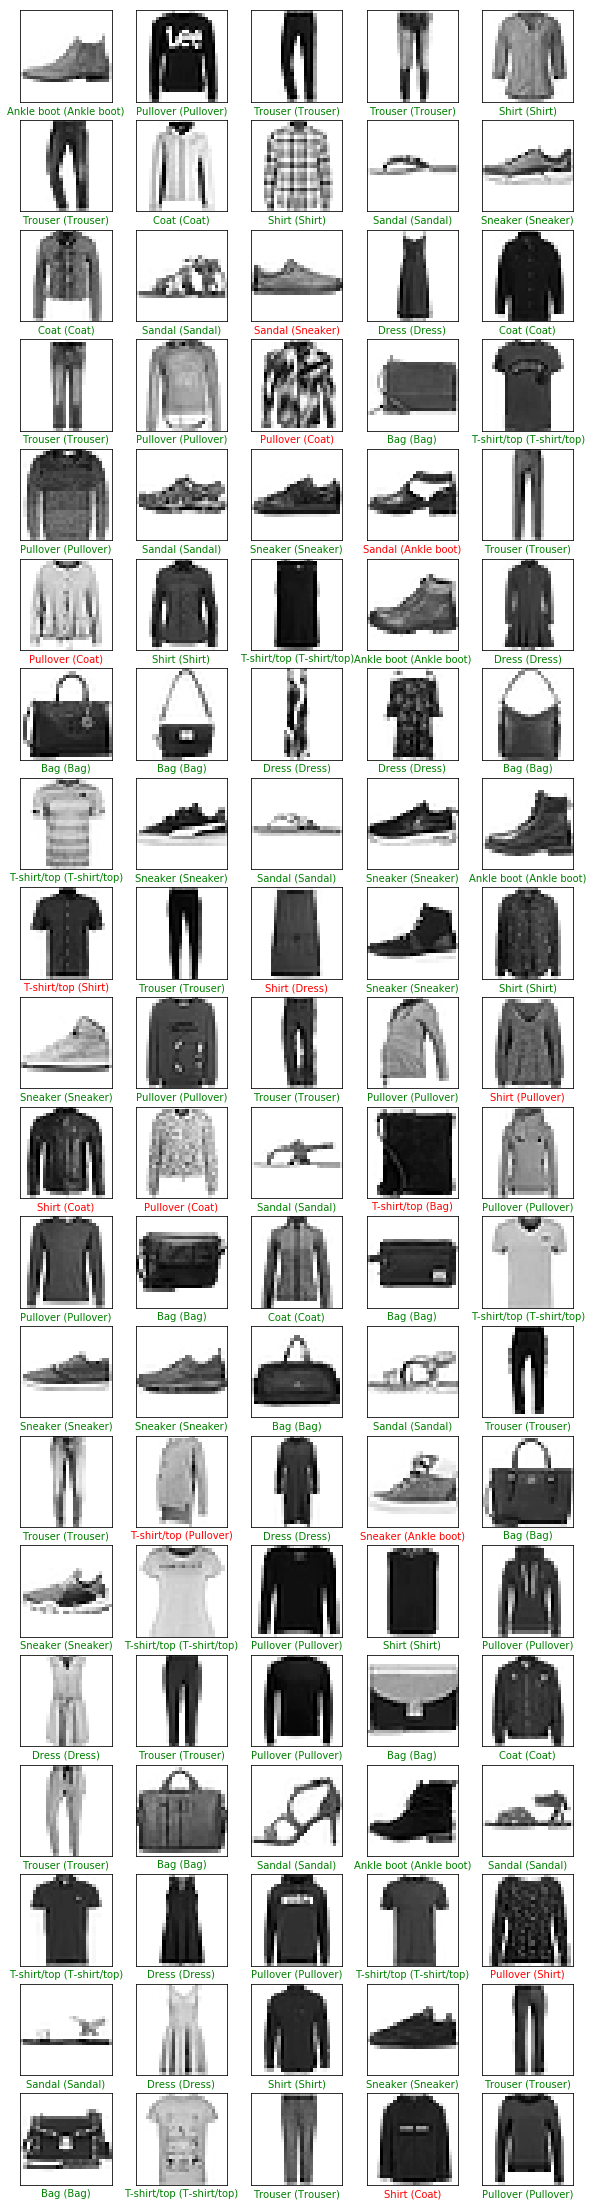

In [17]:
plt.figure(figsize=(10,40))
for i in range(0, 100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)